In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Cleaning 
Data from: http://www1.nyc.gov/site/planning/data-maps/nyc-population/american-community-survey.page

In [3]:
demo = pd.read_excel('../data/dem_2013acs5yr_nta.xlsx', sheetname='DemData')

In [4]:
ancest = pd.read_excel('../data/ancest_2014acs5yr_puma.xlsx', sheetname='Bronx')

In [5]:
pumas = ancest.ix[4, 1:].fillna(method='pad').values

In [6]:
vals = ancest.ix[5, 1:].values

In [7]:
mix = pd.MultiIndex.from_tuples(zip(pumas, vals))

In [8]:
an = ancest.ix[8:115]

In [9]:
an.index = an.ix[:,0]

In [10]:
ancest.index = ancest.ix[:, 0]

In [11]:
reindexed = an.drop(an.columns[0], axis=1)

In [12]:
reindexed.columns = mix

In [13]:
new_dfs = []
for dist in mix.levels[0]:
    df = reindexed[dist].reset_index()
    new_dfs.append(df)

In [14]:
catted = pd.concat(new_dfs)
catted.columns = ['country', 'estimate', 'margin_of_error']

In [33]:
# demo[demo.GeogName.str.contains('Brown')][race_cols] / 
demo[(demo.GeogName.str.contains('Chels')) | ((demo.GeogName.str.contains('Brown')))][race_cols]

,HspE,WtNHE,BlNHE,AIANNHE,AsnNHE,NHPINHE,OthNHE
40,10095,576,46595,75,494,9,231
96,10710,46551,4342,294,8783,0,243


### Desired Data Shape
(neighborhoods, (borough, neighborhood, comdist, puma, pop, gender, nationalities, disability, ancestry))

In [20]:
target_cols = [
    'GeogName', 'Borough',
    'ComDst', 'PopE', 'PopC',
    'MaleE', 'MaleC', 'FemE', 'FemC',
    'PopU5E', 'PopU5C', 'Pop5t9E', 'Pop5t9C',
    'Pop10t14E', 'Pop10t14C', 'Pop15t19E', 'Pop15t19C',
    'Pop20t24E', 'Pop20t24C', 'Pop25t34E', 'Pop25t34C',
    'Pop35t44E', 'Pop35t44C', 'Pop45t54E', 'Pop45t54C',
    'Pop55t59E', 'Pop55t59C', 'Pop60t64E', 'Pop60t64C',
    'Pop60t64E', 'Pop60t64C', 'Pop65t74E', 'Pop65t74C',
    'Pop75t84E', 'Pop75t84C', 'Pop85plE', 'Pop85plE',
    'HspE', 'HspC', 'WtNHE', 'WtNHC', 'BlNHE', 'BlNHC',
    'AIANNHE', 'AIANNHC', 'AsnNHE', 'AsnNHC',
    'NHPINHE', 'NHPINHC', 'OthNHE', 'OthNHC'
]

In [21]:
loc_cols = ['Borough', 'GeogName', 'ComDst']
gender_cols = ['MaleE', 'FemE']
age_cols = [    
    'Pop10t14E', 'Pop15t19E',
    'Pop20t24E', 'Pop25t34E',
    'Pop35t44E', 'Pop45t54E',
    'Pop55t59E', 'Pop60t64E',
    'Pop60t64E', 'Pop65t74E',
    'Pop75t84E', 'Pop85plE'
]
race_cols = [
    'HspE', 'WtNHE', 'BlNHE',
    'AIANNHE', 'AsnNHE',
    'NHPINHE', 'OthNHE',
]

In [22]:
df = demo[target_cols]

### Questions 
 - overall racial distribution 
 - overall gender distribution
 - overall age distribution
 - racial distribution by borough
 - gender distribution by borough
 - age distribution by borough
 - what is the distribution of race by neighborhood
 - population by neighborhood
 - population by borough
 - neighborhood 

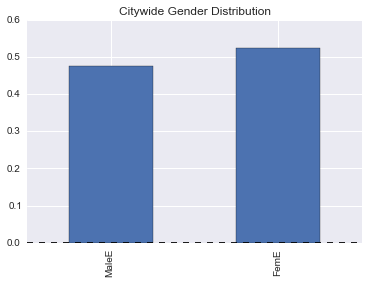

In [19]:
# overall gender distribution
(df[gender_cols].sum() / df.PopE.sum()).plot(kind='bar').set_title('Citywide Gender Distribution');

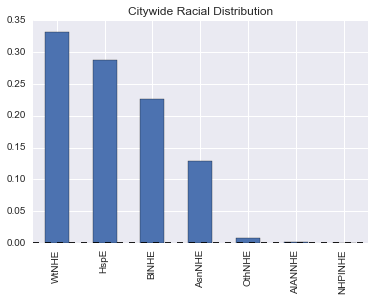

In [20]:
# Racial Distribution
(df[race_cols].sum() / df.PopE.sum()).order(ascending=False).plot(kind='bar').set_title('Citywide Racial Distribution');

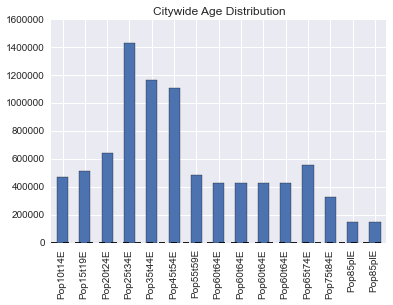

In [21]:
# Citywide age distribution
df[age_cols].sum().plot(kind='bar').set_title('Citywide Age Distribution');

In [239]:
gb_melt = pd.melt(df[loc_cols + gender_cols], id_vars='Borough', value_vars=gender_cols)

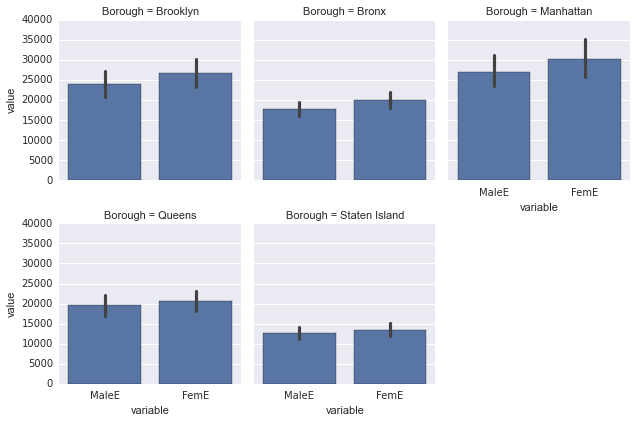

In [302]:
g = sns.FacetGrid(gb_melt, col="Borough", col_wrap=3)
g = g.map(sns.barplot, 'variable', 'value')

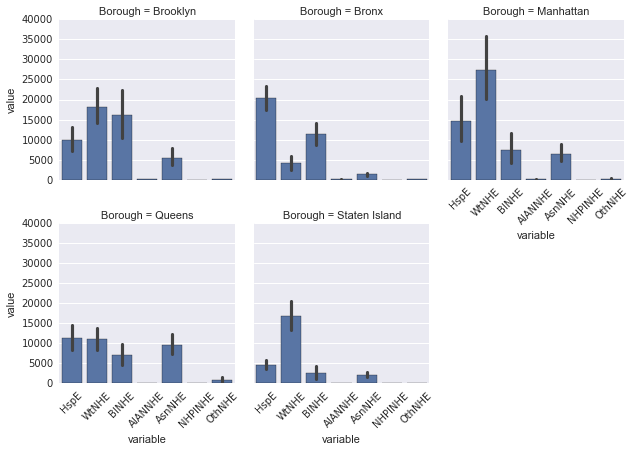

In [311]:
# Race distribution by borough
rb_melt = pd.melt(df[loc_cols + race_cols], id_vars='Borough', value_vars=race_cols)
g = sns.FacetGrid(rb_melt, col="Borough", col_wrap=3)
g = g.map(sns.barplot, 'variable', 'value')
g.set_xticklabels(rotation=45)

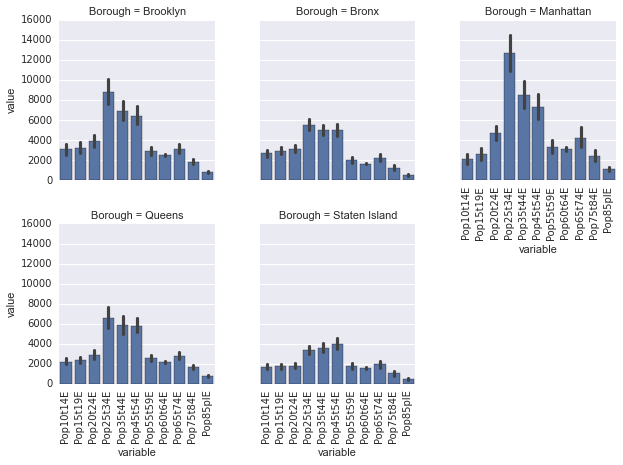

In [310]:
# Age distribution by borough
ab_melt = pd.melt(df[loc_cols + age_cols], id_vars='Borough', value_vars=age_cols)
g = sns.FacetGrid(ab_melt, col="Borough", col_wrap=3)
g = g.map(sns.barplot, 'variable', 'value')
g.set_xticklabels(rotation=90)

### Testing out creating a sample distribution from the data

In [28]:
mean = demo.PopE.ix[0]

In [29]:
merr = demo.PopM.ix[0]

In [30]:
cv = demo.PopC.ix[0]

In [35]:
sd = mean * (cv / 100)